In [17]:
from sympy import *
init_session()
%matplotlib inline

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


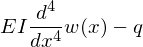

In [2]:
EI, q, kl, kr, L = symbols("EI, q, kl, kr, L")
w = symbols("w", cls=Function)
dv = EI * diff(w(x), x, x, x, x) - q 
dv

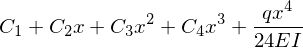

In [3]:
w = dsolve(dv).rhs
w

In [4]:
phi = -diff(w, x)
kappa = diff(phi, x)
M = kappa * EI
V = diff(M, x)

In [5]:
eq_1 = Eq(w).subs({x:0})
eq_2 = Eq(w).subs({x:L})
eq_3 = Eq(lhs=M, rhs=kl * phi).subs({x:0})
eq_4 = Eq(lhs=M, rhs=-kr * phi).subs({x:L})

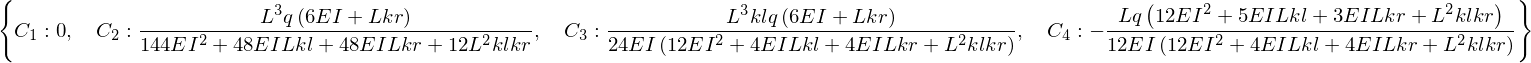

In [11]:
val = solve((eq_1, eq_2, eq_3, eq_4), ('C1, C2, C3, C4'))
val

In [12]:
w = w.subs(val)
kappa = kappa.subs(val)
M = M.subs(val)
V = V.subs(val)

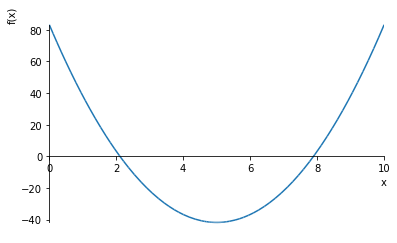

In [75]:
plot(-M.subs({q:10, L:10, EI:100, kr:100*100, kl:100*100}), (x, 0, 10))

In [76]:
M.subs({q:10, L:100, EI:100, kr:1000*100, kl:kr, x:0}).evalf()

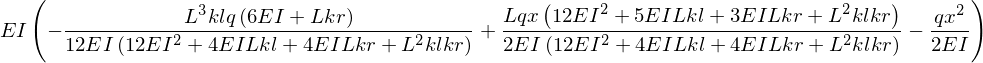

In [77]:
M

In [104]:
M.__str__()

'EI*(-L**3*kl*q*(6*EI + L*kr)/(12*EI*(12*EI**2 + 4*EI*L*kl + 4*EI*L*kr + L**2*kl*kr)) + L*q*x*(12*EI**2 + 5*EI*L*kl + 3*EI*L*kr + L**2*kl*kr)/(2*EI*(12*EI**2 + 4*EI*L*kl + 4*EI*L*kr + L**2*kl*kr)) - q*x**2/(2*EI))'

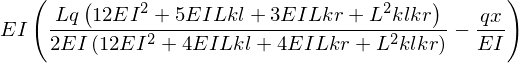

In [105]:
V

In [106]:
V.__str__()

'EI*(L*q*(12*EI**2 + 5*EI*L*kl + 3*EI*L*kr + L**2*kl*kr)/(2*EI*(12*EI**2 + 4*EI*L*kl + 4*EI*L*kr + L**2*kl*kr)) - q*x/EI)'